# Cosmological Distance Measures
This notebook implements key distance measures from the Hogg (2000) paper, including:
- **Comoving Distance**
- **Angular Diameter Distance**
- **Luminosity Distance**
- **Lookback Time**

Plots for each measure are provided for three world models:
- Einstein-de Sitter (ΩM = 1.0, ΩΛ = 0.0)
- Low-density (ΩM = 0.05, ΩΛ = 0.0)
- High-lambda (ΩM = 0.2, ΩΛ = 0.8)

## 1. Comoving Distance
The **Comoving Distance** is the distance between two points in the universe measured along a path that expands with the universe.
This is important for understanding the large-scale structure of the universe and how galaxies are distributed over time.

## 2. Angular Diameter Distance
The **Angular Diameter Distance** relates an object's physical size to its angular size as seen by an observer.
It is used to determine the actual size of astronomical objects, and it decreases after a certain redshift due to the universe's expansion.

## 3. Luminosity Distance
The **Luminosity Distance** connects the observed brightness of an object to its intrinsic luminosity.
This is crucial for measuring distances to faraway galaxies and understanding how their light is affected by redshift.

## 4. Lookback Time
The **Lookback Time** represents the difference between the current age of the universe and the age when light was emitted from a distant object.
This gives us a way to look back in time and understand the evolution of the universe.

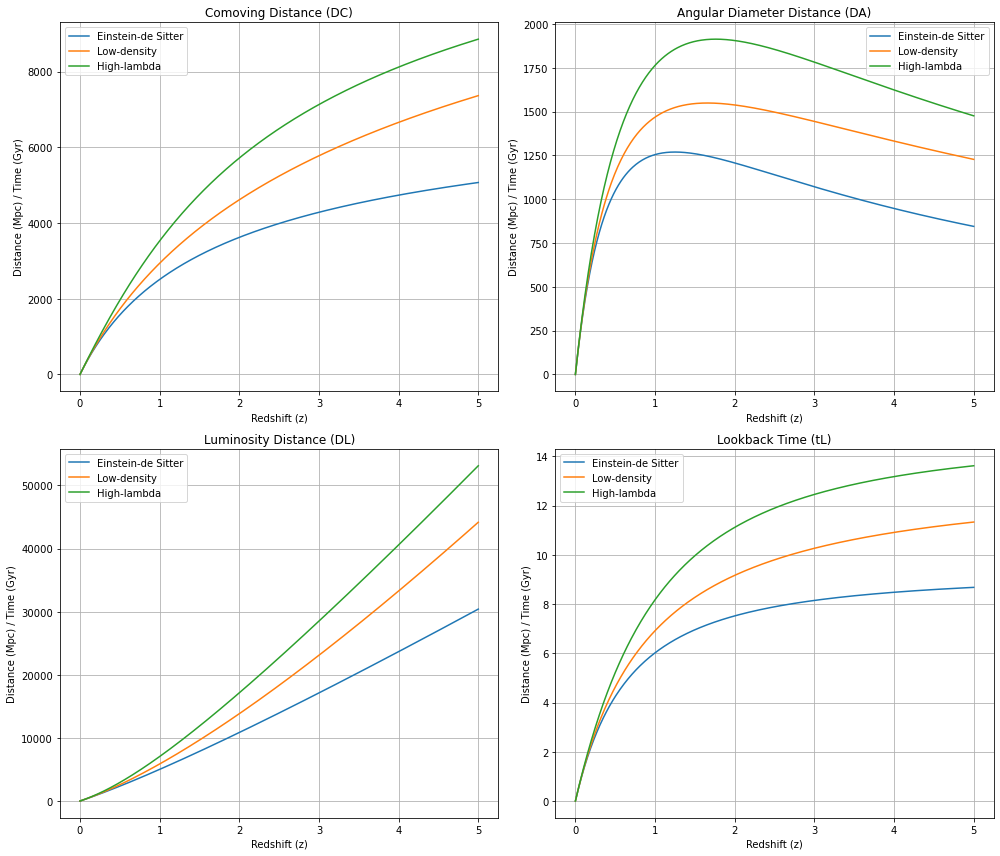

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Constants
H0 = 70  # Hubble constant in km/s/Mpc
c = 299792.458  # Speed of light in km/s
DH = c / H0  # Hubble distance in Mpc

# Parameters for three world models
world_models = {
    "Einstein-de Sitter": {"OmegaM": 1.0, "OmegaLambda": 0.0},
    "Low-density": {"OmegaM": 0.05, "OmegaLambda": 0.0},
    "High-lambda": {"OmegaM": 0.2, "OmegaLambda": 0.8},
}

# Function to compute E(z)
def E(z, OmegaM, OmegaLambda):
    OmegaK = 1.0 - OmegaM - OmegaLambda
    return np.sqrt(OmegaM * (1 + z)**3 + OmegaK * (1 + z)**2 + OmegaLambda)

# Comoving Distance
def comoving_distance(z, OmegaM, OmegaLambda):
    integral, _ = quad(lambda z_prime: 1 / E(z_prime, OmegaM, OmegaLambda), 0, z)
    return DH * integral

# Angular Diameter Distance
def angular_diameter_distance(z, OmegaM, OmegaLambda):
    return comoving_distance(z, OmegaM, OmegaLambda) / (1 + z)

# Luminosity Distance
def luminosity_distance(z, OmegaM, OmegaLambda):
    return comoving_distance(z, OmegaM, OmegaLambda) * (1 + z)

# Lookback Time
def lookback_time(z, OmegaM, OmegaLambda):
    integral, _ = quad(lambda z_prime: 1 / ((1 + z_prime) * E(z_prime, OmegaM, OmegaLambda)), 0, z)
    tH = 9.78 / (H0 / 100)  # Hubble time in Gyr
    return tH * integral

# Redshift range
z_range = np.linspace(0, 5, 500)

# Plotting distances for different world models
fig, axs = plt.subplots(2, 2, figsize=(14, 12))
for model, params in world_models.items():
    OmegaM = params["OmegaM"]
    OmegaLambda = params["OmegaLambda"]
    
    dC = [comoving_distance(z, OmegaM, OmegaLambda) for z in z_range]
    dA = [angular_diameter_distance(z, OmegaM, OmegaLambda) for z in z_range]
    dL = [luminosity_distance(z, OmegaM, OmegaLambda) for z in z_range]
    tL = [lookback_time(z, OmegaM, OmegaLambda) for z in z_range]
    
    axs[0, 0].plot(z_range, dC, label=model)
    axs[0, 1].plot(z_range, dA, label=model)
    axs[1, 0].plot(z_range, dL, label=model)
    axs[1, 1].plot(z_range, tL, label=model)

# Labels and titles
axs[0, 0].set_title("Comoving Distance (DC)")
axs[0, 1].set_title("Angular Diameter Distance (DA)")
axs[1, 0].set_title("Luminosity Distance (DL)")
axs[1, 1].set_title("Lookback Time (tL)")

for ax in axs.flat:
    ax.set_xlabel("Redshift (z)")
    ax.set_ylabel("Distance (Mpc) / Time (Gyr)")
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()